In [1]:
import xarray as xr
from aqua.diagnostics.core import OutputSaver
from aqua.util import open_image
import matplotlib.pyplot as plt


/work/bb1153/b382321/miniforge3/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


The cell below initializes an ``OutputSaver class`` instance with the specified parameters: ``diagnostic``, ``catalog``, ``model``, ``exp``, ``outdir`` and ``loglevel``. This instance will be used for generating descriptive filenames for the output files.

Many diagnostics are based on comparisons between two datasets, such as a model and a reference dataset. 
In those cases, the triplet ``catalog-model-experiment`` for the reference dataset should be specified as well in the OutputSaver constructor.

In [2]:
outputsaver = OutputSaver(diagnostic='globalbiases',
                          catalog='climatedt-phase1', model='IFS-NEMO', exp='historical-1990',
                          catalog_ref='obs', model_ref='ERA5', exp_ref='era5',
                          outdir='.', loglevel= 'DEBUG')

Let's now generate a filename based on provided parameters.
The ``generate_name`` method of the ``OutputSaver`` class requires to specify the ``diagnostic_product``, i.e. the type of output generate by the diagnostic (e.g. gregoryplot, histogram, timeseries, biasmap ecc.)

In [3]:
outputsaver.generate_name(diagnostic_product='biasmap')

2025-06-17 16:32:23 :: OutputSaver :: DEBUG    -> Generated filename: globalbiases.biasmap.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5


'globalbiases.biasmap.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5'

If not specified in the outputsaver constructor, the catalog-model-experiment triplets for the principale and the reference dataset can be specified in the ``generate_name`` method.

The user can also specify some extra parameters that will be added to the filename, such as ``variable``, ``region``, ``period``, ``pressure level`` etc.
Extra-keys are not mandatory, but if specified, they will be added to the filename.
They are completely free and can be used to add any kind of information that the user wants to have in the filename.

In [4]:
extra_keys = {'variable': 'q',
              'plev': 180000}

outputsaver.generate_name(diagnostic_product='biasmap', extra_keys=extra_keys)

2025-06-17 16:32:23 :: OutputSaver :: DEBUG    -> Generated filename: globalbiases.biasmap.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000


'globalbiases.biasmap.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000'

Let's save a NetCDF file:

In [5]:
data = xr.Dataset({'data': (('x', 'y'), [[1, 2], [3, 4]])})

metadata = {
    'title': 'Testing the saving of NetCDF files',
    'author': 'OutputSaver',
    'description': 'Demonstrating netCDF Metadata Addition',
    'history': 'Created on 2023-10-01'
}

outputsaver.save_netcdf(data, 'test', extra_keys=extra_keys, metadata=metadata)

2025-06-17 16:32:23 :: OutputSaver :: DEBUG    -> Generated filename: globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000
2025-06-17 16:32:23 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-06-17 16:32:23 :: OutputSaver :: INFO     -> Saved NetCDF: ./netcdf/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.nc


'./netcdf/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.nc'

In [6]:
xr.open_dataset('netcdf/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.nc')

<xarray.Dataset> Size: 32B
Dimensions:  (x: 2, y: 2)
Dimensions without coordinates: x, y
Data variables:
    data     (x, y) int64 32B ...
Attributes: (12/16)
    history:             \n2025-06-17 16:32:23 AQUA💧: Created on 2023-10-01;\n
    diagnostic:          globalbiases
    diagnostic_product:  test
    catalog:             climatedt-phase1
    model:               IFS-NEMO
    exp:                 historical-1990
    ...                  ...
    plev:                180000
    timestamp:           2025-06-17 16:32:23
    aqua_version:        0.16.0-alpha
    title:               Testing the saving of NetCDF files
    author:              OutputSaver
    description:         Demonstrating netCDF Metadata Addition

Let's now save a plot in PDF and png formats, adding also some metadata. 

2025-06-17 16:32:25 :: OutputSaver :: DEBUG    -> Generated filename: globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000
2025-06-17 16:32:25 :: create_folder :: INFO     -> Folder ./pdf already exists
2025-06-17 16:32:26 :: add_pdf_metadata :: DEBUG    -> Keeping old metadata
2025-06-17 16:32:26 :: OutputSaver :: INFO     -> Saved PDF: ./pdf/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.pdf


'./pdf/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.pdf'

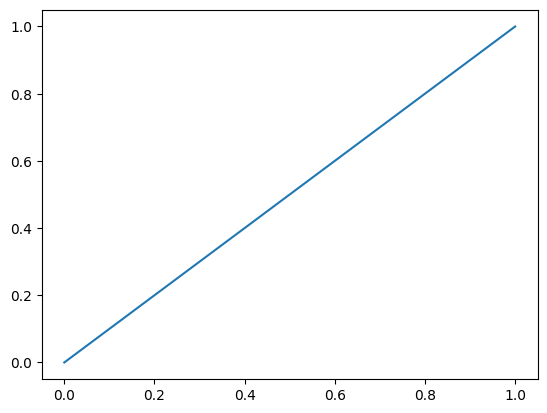

In [7]:
metadata = {
    'Title': 'Sample PDF/png',
    'Author': 'OutputSaver',
    'Subject': 'Demonstrating PDF/png Metadata Addition',
}

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1])

outputsaver.save_pdf(fig, 'test', extra_keys=extra_keys, metadata=metadata)

Let's open the saved file to check that the metadata has been correctly added.

As you can see, the aqua_version and the timestamp are default metadata always added automatically to the output files.


In [10]:

open_image("pdf/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.pdf")

/home/b/b382321/AQUA/notebooks/diagnostics/pdf/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.pdf

{'producer': 'Matplotlib pdf backend v3.10.3',
 'creator': 'Matplotlib v3.10.3, https://matplotlib.org',
 'creationdate': "D:20250617163226+02'00'",
 'diagnostic': 'globalbiases',
 'diagnostic_product': 'test',
 'catalog': 'climatedt-phase1',
 'model': 'IFS-NEMO',
 'exp': 'historical-1990',
 'catalog_ref': 'obs',
 'model_ref': 'ERA5',
 'exp_ref': 'era5',
 'variable': 'q',
 'plev': '180000',
 'timestamp': '2025-06-17 16:32:26',
 'aqua_version': '0.16.0-alpha',
 'title': 'Sample PDF/png',
 'author': 'OutputSaver',
 'subject': 'Demonstrating PDF/png Metadata Addition'}

Let's now save the plot in png format:

In [11]:
outputsaver.save_png(fig, 'test', extra_keys=extra_keys, dpi=300)

open_image("png/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.png")

2025-06-17 16:33:07 :: OutputSaver :: DEBUG    -> Generated filename: globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000
2025-06-17 16:33:07 :: create_folder :: INFO     -> Folder ./png already exists
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: diagnostic = globalbiases
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: diagnostic_product = test
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: catalog = climatedt-phase1
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: model = IFS-NEMO
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: exp = historical-1990
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: catalog_ref = obs
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: model_ref = ERA5
2025-06-17 16:33:07 :: add_png_metadata :: DEBUG    -> Adding metadata: exp_ref = era5
2025-06-17 16:33:07 :: 

/home/b/b382321/AQUA/notebooks/diagnostics/png/globalbiases.test.climatedt-phase1.IFS-NEMO.historical-1990.obs.ERA5.era5.q.180000.png

{'diagnostic': 'globalbiases',
 'diagnostic_product': 'test',
 'catalog': 'climatedt-phase1',
 'model': 'IFS-NEMO',
 'exp': 'historical-1990',
 'catalog_ref': 'obs',
 'model_ref': 'ERA5',
 'exp_ref': 'era5',
 'variable': 'q',
 'plev': '180000',
 'timestamp': '2025-06-17 16:33:07',
 'aqua_version': '0.16.0-alpha'}

In some diagnostics we may want to do a multimodel or multireference comparison.
In this case, the user can specify a list of catalog-model-experiment triplets for the reference dataset. To avoid too long filenames, the keyword ``multimodel`` or ``multiref`` will be used to indicate that the dataset is a list of triplets.
Full information about the datasets will be stored in output file metadata.

In [12]:
outputsaver = OutputSaver(diagnostic='globalbiases',
                          catalog=['climatedt-phase1', 'climatedt-phase1'], model=['IFS-NEMO', 'ICON'],
                          exp=['historical-1990', 'historical-1990'],
                          catalog_ref='obs', model_ref='ERA5', exp_ref='era5',
                          outdir='.', loglevel= 'DEBUG')
outputsaver.generate_name(diagnostic_product='test')



2025-06-17 16:33:10 :: OutputSaver :: DEBUG    -> Generated filename: globalbiases.test.multimodel.obs.ERA5.era5


'globalbiases.test.multimodel.obs.ERA5.era5'

The information about the datasets will not appear in the filename but it will be stored in the metadata of the output file, so that it can be easily retrieved later.

2025-06-17 16:33:14 :: OutputSaver :: DEBUG    -> Generated filename: globalbiases.test.multimodel.obs.ERA5.era5
2025-06-17 16:33:14 :: create_folder :: INFO     -> Folder ./pdf already exists
2025-06-17 16:33:14 :: add_pdf_metadata :: DEBUG    -> Keeping old metadata
2025-06-17 16:33:14 :: OutputSaver :: INFO     -> Saved PDF: ./pdf/globalbiases.test.multimodel.obs.ERA5.era5.pdf


/home/b/b382321/AQUA/notebooks/diagnostics/pdf/globalbiases.test.multimodel.obs.ERA5.era5.pdf

{'producer': 'Matplotlib pdf backend v3.10.3',
 'creator': 'Matplotlib v3.10.3, https://matplotlib.org',
 'creationdate': "D:20250617163314+02'00'",
 'diagnostic': 'globalbiases',
 'diagnostic_product': 'test',
 'catalog': "['climatedt-phase1', 'climatedt-phase1']",
 'model': "['IFS-NEMO', 'ICON']",
 'exp': "['historical-1990', 'historical-1990']",
 'catalog_ref': 'obs',
 'model_ref': 'ERA5',
 'exp_ref': 'era5',
 'timestamp': '2025-06-17 16:33:14',
 'aqua_version': '0.16.0-alpha',
 'title': 'Sample PDF/png',
 'author': 'OutputSaver',
 'subject': 'Demonstrating PDF/png Metadata Addition'}

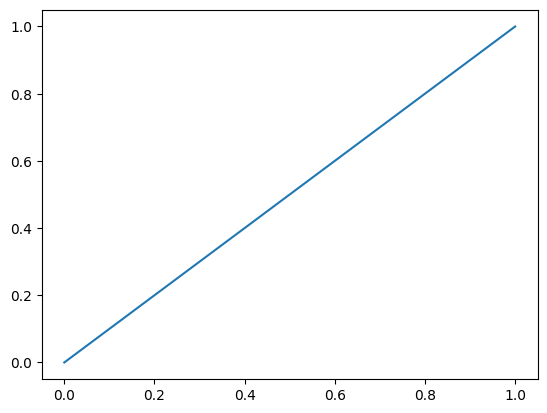

In [13]:
metadata = {
    'Title': 'Sample PDF/png',
    'Author': 'OutputSaver',
    'Subject': 'Demonstrating PDF/png Metadata Addition',
}

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1])

outputsaver.save_pdf(fig, 'test', metadata=metadata)
open_image("pdf/globalbiases.test.multimodel.obs.ERA5.era5.pdf")